# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# [Dependencias y resultados previos](./03-segmentacion.ipynb)

## Dependencias

In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters

## Resultados

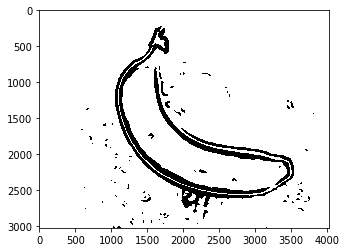

In [2]:
img = io.imread('./imgs/examples/banana_example.jpg')
banana_float = img_as_float(img)

banana = color.rgb2gray(banana_float)
bg1 = filters.gaussian(banana, sigma=20)
bc1 = filters.sobel(bg1)

th = filters.threshold_otsu(bc1)
bf = bc1 < th

fig, ax = plt.subplots()
ax.imshow(bf)

---
# Extracción de características
---

La extracción de características de la imágen filtrada y segmentada es el último paso, previo a los algoritmos de clasificación.

La extracción consiste en obtener valores numéricos característicos de la imagen que serán la entrada a los algoritmos _K-means_ y _K-nn_.

## Matriz de covarianza

Siendo los elementos de la matriz de covarianza calculados como:

$$
cov(x, y) = \frac{1}{n}\sum (X_{i}-\hat{X})(Y_{i}-\hat{Y})
$$

In [5]:
print(bf.dtype)

bool
